In [7]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
songs = pd.read_csv('data/top2018.csv')

In [4]:
songs.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [10]:
metadata = songs.loc[:,'id':'artists']
X = songs.loc[:,'danceability':]

In [11]:
metadata.head()

,id,name,artists
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake


In [12]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [13]:
ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

In [14]:
X_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.287854,-1.455314,0.456531,-1.997753,0.833616,-0.063162,-0.739184,-0.112147,3.543567,-0.621334,-1.491544,-0.156599,0.100504
1,0.180503,-0.319108,0.729903,0.450984,0.833616,0.282982,0.283383,0.159656,-0.317744,-0.055789,-1.566444,-0.969690,0.100504
2,-0.992691,-0.859498,-0.090213,-0.233147,-1.199593,-0.247772,-0.357995,-0.113440,-0.245738,-1.679294,1.394085,0.325071,0.100504
3,0.172835,-0.693224,0.729903,-1.319276,0.833616,0.013759,1.748092,-0.118343,-0.416751,-0.221552,0.705712,0.407795,0.100504
4,0.908957,-0.229043,-1.183701,-0.087840,0.833616,0.090680,-0.622280,-0.113859,2.139454,-0.655462,-1.007767,0.319494,0.100504


In [16]:
X_scaled.describe().loc[['mean', 'std'],:]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
mean,-7.394085e-16,-6.394885e-16,-4.440892e-18,-4.379830e-16,4.440892e-17,-7.660539e-17,-6.661338e-17,-1.665335e-18,-2.364775e-16,-2.817191e-16,5.909162e-16,8.604228e-18,-4.718448e-18
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00


Let's do some clustering!

In [17]:
kmeans = KMeans(n_clusters=3)

In [18]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
kmeans.labels_

array([2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 1,
       0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2], dtype=int32)

In [24]:
cluster_center_df = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

In [25]:
cluster_center_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.161166,0.331810,-0.369942,0.306216,0.833616,-0.225456,-0.322657,0.123647,0.013734,-0.044791,0.107876,0.094064,0.100504
1,0.284260,0.522222,0.251502,0.555052,-1.199593,0.053632,-0.190226,-0.105103,-0.032843,0.544493,-0.051823,0.128755,0.100504
2,-0.086648,-1.239158,0.314378,-1.237158,0.101660,0.319135,0.798459,-0.078141,0.018415,-0.619911,-0.119213,-0.326596,-0.301511


In [27]:
cluster_center_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.012149,-0.128375,0.065313,-0.125297,-0.088106,0.049104,0.095192,-0.019866,-0.000231,-0.040069,-0.021053,-0.034592,-0.033501
std,0.238583,0.966666,0.378251,0.970905,1.029803,0.272323,0.612636,0.125014,0.028339,0.582216,0.116630,0.253477,0.232104
min,-0.161166,-1.239158,-0.369942,-1.237158,-1.199593,-0.225456,-0.322657,-0.105103,-0.032843,-0.619911,-0.119213,-0.326596,-0.301511
25%,-0.123907,-0.453674,-0.059220,-0.465471,-0.548966,-0.085912,-0.256441,-0.091622,-0.009554,-0.332351,-0.085518,-0.116266,-0.100504
50%,-0.086648,0.331810,0.251502,0.306216,0.101660,0.053632,-0.190226,-0.078141,0.013734,-0.044791,-0.051823,0.094064,0.100504
75%,0.098806,0.427016,0.282940,0.430634,0.467638,0.186383,0.304116,0.022753,0.016075,0.249851,0.028027,0.111410,0.100504
max,0.284260,0.522222,0.314378,0.555052,0.833616,0.319135,0.798459,0.123647,0.018415,0.544493,0.107876,0.128755,0.100504


In [29]:
kmeans.inertia_

1051.1961072771526

In [36]:
inertia_k = {}
silhouette_k = {}
for k in range(2,30):
    km = KMeans(k)
    km.fit(X_scaled)
    inertia_k[k] = km.inertia_
    silhouette_k[k] = silhouette_score(X_scaled, km.labels_)

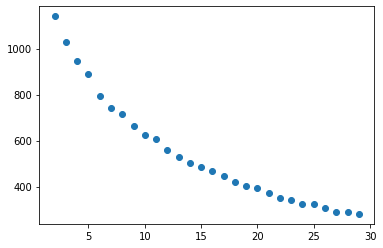

In [38]:
plt.scatter(inertia_k.keys(), inertia_k.values())

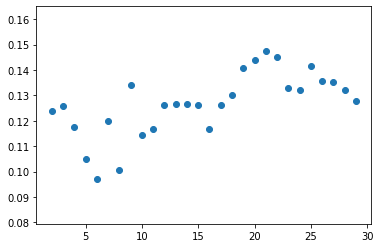

In [39]:
plt.scatter(silhouette_k.keys(), silhouette_k.values())

In [41]:
pca = PCA(n_components=3)

In [42]:
pca_results = pd.DataFrame(pca.fit_transform(X_scaled))
pca_results.columns = [f'pca_{i}' for i in range(len(pca_results.columns))]

In [43]:
pca_results

,pca_0,pca_1,pca_2
0,1.873432,-0.075201,-0.430423
1,0.317420,-0.644236,-0.726252
2,1.082803,0.995277,1.132766
3,1.924109,-0.375000,0.046845
4,-0.078948,0.357886,-0.189361
...,...,...,...
95,1.034064,0.724221,0.136357
96,0.651969,0.805872,-0.192053
97,-2.314492,-0.702813,3.322153
98,2.231078,2.367968,1.123872


In [57]:
pca_results['artists'] = metadata.artists
km = KMeans(3)
km.fit(X_scaled)
pca_results['labels'] = km.labels_
pca_results.head()

,pca_0,pca_1,pca_2,artists,labels
0,1.873432,-0.075201,-0.430423,Drake,1
1,0.317420,-0.644236,-0.726252,XXXTENTACION,1
2,1.082803,0.995277,1.132766,Post Malone,2
3,1.924109,-0.375000,0.046845,Post Malone,1
4,-0.078948,0.357886,-0.189361,Drake,2


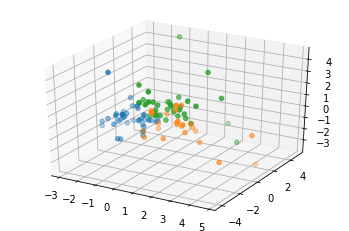

In [66]:
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')

label_list = list(np.unique(km.labels_))

for l in label_list:
    df_label = pca_results[pca_results.labels == l]
    ax.scatter(df_label['pca_0'], df_label['pca_1'], df_label['pca_2'])
    
    #for i, name in enumerate(pca_results.artists):
        #ax.annotate(name, (pca_results['pca_0'][i], pca_results['pca_1'][i], pca_results['pca_2'][i]))

----

In [5]:
from PIL import Image


In [10]:
import numpy as np
img = Image.open('images/bakeoff.jpg')
data = img.getdata()
rgb = [d for d in data]


In [11]:
# Suppress specific bands (e.g. (255, 120, 65) -> (0, 120, 0) for g)
r = [(d[0], 0, 0) for d in data]
g = [(0, d[1], 0) for d in data]
b = [(0, 0, d[2]) for d in data]


In [12]:
img.putdata(r)
img.save('images/r.png')
img.putdata(g)
img.save('images/g.png')
img.putdata(b)
img.save('images/b.png')

In [13]:
rgb = [d for d in data]